Objectives
After completing this lab you will be able to:

Handle missing data in different ways
Correct the data type of different data values as per requirement
Standardize and normalize the appropriate data attributes
Visualize the data as grouped bar graph using Binning
Cnverting a categorical data into numerical indicator variables

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import requests

In [4]:
# download the dataset into your local machine
def download(url, filename):
    response = requests.get(url)
    if response.status_code == 200:
        with open(filename, "wb") as f:
            f.write(response.content)

filename = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-Coursera/laptop_pricing_dataset_mod1.csv"

In [5]:
# load data into a pandas.dataframe
df = pd.read_csv(filename, header=0)

In [6]:
# verify loading by displaying dataframe summary using dataframe.info()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 238 entries, 0 to 237
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      238 non-null    int64  
 1   Manufacturer    238 non-null    object 
 2   Category        238 non-null    int64  
 3   Screen          238 non-null    object 
 4   GPU             238 non-null    int64  
 5   OS              238 non-null    int64  
 6   CPU_core        238 non-null    int64  
 7   Screen_Size_cm  234 non-null    float64
 8   CPU_frequency   238 non-null    float64
 9   RAM_GB          238 non-null    int64  
 10  Storage_GB_SSD  238 non-null    int64  
 11  Weight_kg       233 non-null    float64
 12  Price           238 non-null    int64  
dtypes: float64(3), int64(8), object(2)
memory usage: 24.3+ KB


In [7]:
# View first 5 values of the updated dataframe
df.head()

,Unnamed: 0,Manufacturer,Category,Screen,GPU,OS,CPU_core,Screen_Size_cm,CPU_frequency,RAM_GB,Storage_GB_SSD,Weight_kg,Price
0,0,Acer,4,IPS Panel,2,1,5,35.560,1.6,8,256,1.60,978
1,1,Dell,3,Full HD,1,1,3,39.624,2.0,4,256,2.20,634
2,2,Dell,3,Full HD,1,1,7,39.624,2.7,8,256,2.20,946
3,3,Dell,4,IPS Panel,2,1,5,33.782,1.6,8,128,1.22,1244
4,4,HP,4,Full HD,2,1,7,39.624,1.8,8,256,1.91,837


In [9]:
# round values for column "Screen_Size_cm" to nearest 2 decimal places using numpy.round()
df[["Screen_Size_cm"]] = np.round(df[["Screen_Size_cm"]],2)
df.head()

,Unnamed: 0,Manufacturer,Category,Screen,GPU,OS,CPU_core,Screen_Size_cm,CPU_frequency,RAM_GB,Storage_GB_SSD,Weight_kg,Price
0,0,Acer,4,IPS Panel,2,1,5,35.56,1.6,8,256,1.60,978
1,1,Dell,3,Full HD,1,1,3,39.62,2.0,4,256,2.20,634
2,2,Dell,3,Full HD,1,1,7,39.62,2.7,8,256,2.20,946
3,3,Dell,4,IPS Panel,2,1,5,33.78,1.6,8,128,1.22,1244
4,4,HP,4,Full HD,2,1,7,39.62,1.8,8,256,1.91,837


In [13]:
# EVALUATING THE DATASET FOR MISSING DATA
missing_data = df.isnull()
print(missing_data.head())

for column in missing_data.columns.values.tolist():
    print(column)
    print(missing_data[column].value_counts())
    print("")

   Unnamed: 0  Manufacturer  Category  Screen    GPU     OS  CPU_core  \
0       False         False     False   False  False  False     False   
1       False         False     False   False  False  False     False   
2       False         False     False   False  False  False     False   
3       False         False     False   False  False  False     False   
4       False         False     False   False  False  False     False   

   Screen_Size_cm  CPU_frequency  RAM_GB  Storage_GB_SSD  Weight_kg  Price  
0           False          False   False           False      False  False  
1           False          False   False           False      False  False  
2           False          False   False           False      False  False  
3           False          False   False           False      False  False  
4           False          False   False           False      False  False  
Unnamed: 0
Unnamed: 0
False    238
Name: count, dtype: int64

Manufacturer
Manufacturer
False    23

In [14]:
# REPLACE WITH MEAN -continuous data are best replaced using Mean value
# replace missing values in attributes that have continues data using Mean Value, "Weight_kg"

# convert values to desired data type using .astype() function and get mean using .mean() function
avg_weight = df["Weight_kg"].astype("float").mean(axis=0)
df["Weight_kg"].replace(np.nan, avg_weight, inplace=True)
df["Weight_kg"]

0      1.60
1      2.20
2      2.20
3      1.22
4      1.91
       ... 
233    1.70
234    1.20
235    1.36
236    2.40
237    1.95
Name: Weight_kg, Length: 238, dtype: float64

In [15]:
# REPLACE WITH THE MOST FREQUENT VALUE -categorical data are best replaced using the most frequent value
# Replace "Screen_Size_cm" missing values

common_screen_size = df["Screen_Size_cm"].value_counts().idxmax()
df["Screen_Size_cm"].replace(np.nan, common_screen_size, inplace=True)
df["Screen_Size_cm"]

0      35.56
1      39.62
2      39.62
3      33.78
4      39.62
       ...  
233    35.56
234    33.78
235    30.48
236    39.62
237    35.56
Name: Screen_Size_cm, Length: 238, dtype: float64

In [20]:
# FIXING DATA TYPES
# Fix the data type of columns "Weight_kg", "Screen_Size_cm" from object to float
df[["Weight_kg", "Screen_Size_cm"]] = df[["Weight_kg", "Screen_Size_cm"]].astype("float")

# check if correct data type has been implemented using info() function or dtypes attribute
df[["Weight_kg", "Screen_Size_cm"]].info()
df[["Weight_kg", "Screen_Size_cm"]].dtypes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 238 entries, 0 to 237
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Weight_kg       238 non-null    float64
 1   Screen_Size_cm  238 non-null    float64
dtypes: float64(2)
memory usage: 3.8 KB


Weight_kg         float64
Screen_Size_cm    float64
dtype: object

In [31]:
# DATA STANDARDIZATION
# 1 inch = 2.54 cm
# 1 kg   = 2.205 pounds

# Data standardization: convert weight from kg to pounds
df["Weight_kg"] = df["Weight_kg"]*2.205
df.rename(columns={'Weight_kg':'Weight_pounds'}, inplace=True)

# Data standardization: convert screen size from cm to inch
df["Screen_Size_cm"] = df["Screen_Size_cm"]/2.54
df.rename(columns={'Screen_Size_cm':'Screen_Size_inch'}, inplace=True)

df.head()

,Unnamed: 0,Manufacturer,Category,Screen,GPU,OS,CPU_core,Screen_Size_inch,CPU_frequency,RAM_GB,Storage_GB_SSD,Weight_pounds,Price
0,0,Acer,4,IPS Panel,2,1,5,14.000000,1.6,8,256,3.52800,978
1,1,Dell,3,Full HD,1,1,3,15.598425,2.0,4,256,4.85100,634
2,2,Dell,3,Full HD,1,1,7,15.598425,2.7,8,256,4.85100,946
3,3,Dell,4,IPS Panel,2,1,5,13.299213,1.6,8,128,2.69010,1244
4,4,HP,4,Full HD,2,1,7,15.598425,1.8,8,256,4.21155,837


In [33]:
# DATA NORMALIZATION
# normalize a continuous data attribute. Write a code to normalize the "CPU_frequency" attribute with respect to the maximum value available in the dataset.

df["CPU_frequency"] = df["CPU_frequency"] / df["CPU_frequency"].max()
df["CPU_frequency"].head()

0    0.551724
1    0.689655
2    0.931034
3    0.551724
4    0.620690
Name: CPU_frequency, dtype: float64

In [37]:
# BINNING
bins = np.linspace(min(df["Price"]), max(df["Price"]), 4)
group_names = ['Low', 'Medium', 'High']
df['Price-binned'] = pd.cut(df['Price'], bins, labels=group_names, include_lowest=True)
df[["Price", "Price-binned"]].head()
df["Price-binned"].value_counts()

Price-binned
Low       160
Medium     72
High        6
Name: count, dtype: int64

Text(0.5, 1.0, 'Price Bins')

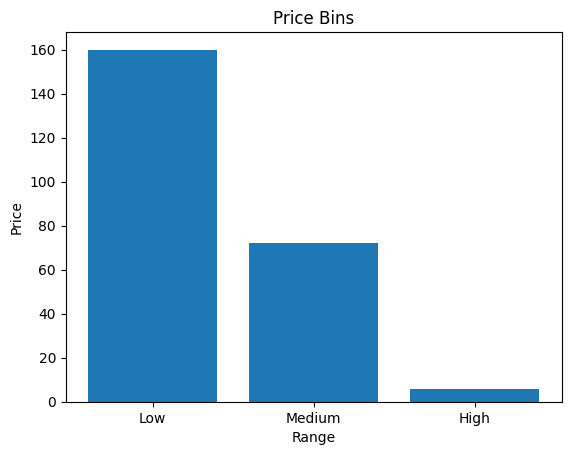

In [38]:
plt.bar(group_names, df["Price-binned"].value_counts())
plt.xlabel("Range")
plt.ylabel("Price")
plt.title("Price Bins")

In [39]:
# Indicator Variables
# Convert "Screen" attribute to "Screen-IPS_panel" and "Screen-Full_HD" then drop "Screen"
dummy_variable_1 = pd.get_dummies(df["Screen"])
dummy_variable_1.head()

,Full HD,IPS Panel
0,False,True
1,True,False
2,True,False
3,False,True
4,True,False


In [40]:
# Convert Screen to "Screen-IPS_panel" and "Screen-Full_HD" 
dummy_variable_1.rename(columns={'IPS Panel':'Screen-IPS_panel', 'Full HD': 'Screen-Full_HD'}, inplace=True)
df = pd.concat([df, dummy_variable_1], axis=1)
df.head()

,Unnamed: 0,Manufacturer,Category,Screen,GPU,OS,CPU_core,Screen_Size_inch,CPU_frequency,RAM_GB,Storage_GB_SSD,Weight_pounds,Price,Price-binned,Screen-Full_HD,Screen-IPS_panel
0,0,Acer,4,IPS Panel,2,1,5,14.000000,0.551724,8,256,3.52800,978,Low,False,True
1,1,Dell,3,Full HD,1,1,3,15.598425,0.689655,4,256,4.85100,634,Low,True,False
2,2,Dell,3,Full HD,1,1,7,15.598425,0.931034,8,256,4.85100,946,Low,True,False
3,3,Dell,4,IPS Panel,2,1,5,13.299213,0.551724,8,128,2.69010,1244,Low,False,True
4,4,HP,4,Full HD,2,1,7,15.598425,0.620690,8,256,4.21155,837,Low,True,False


In [41]:
# drop original column "Screen" from "df"
df.drop("Screen", axis=1,inplace=True)
df.head()

,Unnamed: 0,Manufacturer,Category,GPU,OS,CPU_core,Screen_Size_inch,CPU_frequency,RAM_GB,Storage_GB_SSD,Weight_pounds,Price,Price-binned,Screen-Full_HD,Screen-IPS_panel
0,0,Acer,4,2,1,5,14.000000,0.551724,8,256,3.52800,978,Low,False,True
1,1,Dell,3,1,1,3,15.598425,0.689655,4,256,4.85100,634,Low,True,False
2,2,Dell,3,1,1,7,15.598425,0.931034,8,256,4.85100,946,Low,True,False
3,3,Dell,4,2,1,5,13.299213,0.551724,8,128,2.69010,1244,Low,False,True
4,4,HP,4,2,1,7,15.598425,0.620690,8,256,4.21155,837,Low,True,False
